In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0, 1, size = (200, 2))

In [4]:
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int')

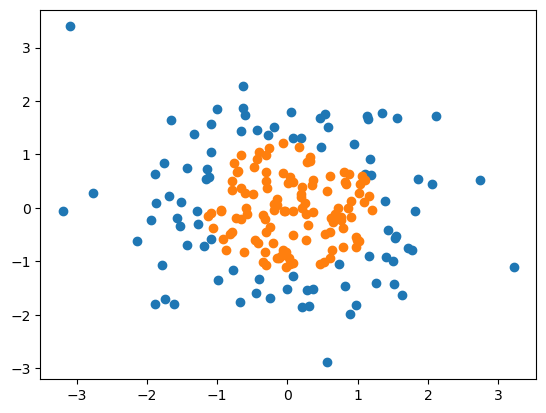

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

# 逻辑回归

In [6]:
import sys
sys.path.append(r'C:\\N-20KEPC0Y7KFA-Data\\junhuawa\\Documents\\00-Play-with-ML-in-Python\\Jupyter')
import playML
from playML.LogisticRegression import LogisticRegression

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [9]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree = 2)

In [11]:
poly_log_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [12]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

Text(0.5, 1.0, 'degree = 2')

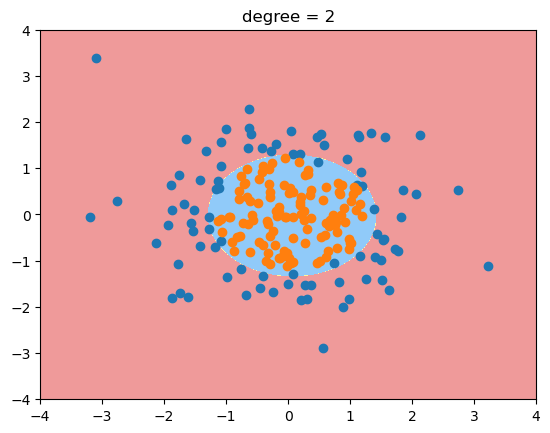

In [21]:
plot_decision_boundary(poly_log_reg, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("degree = 2")

In [15]:
poly_log_reg.score(X, y)

In [17]:
poly_log_reg2 = PolynomialLogisticRegression(degree = 20)
poly_log_reg2.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

Text(0.5, 1.0, 'degree = 20')

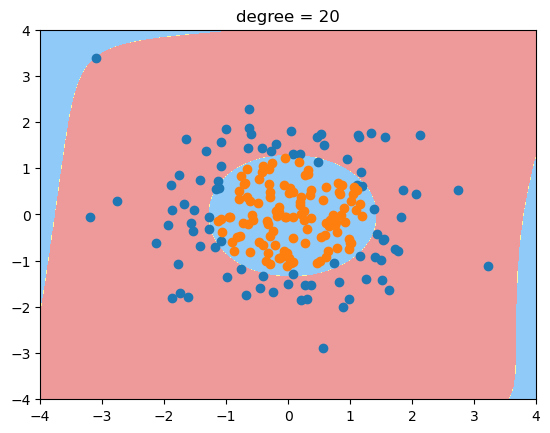

In [20]:
plot_decision_boundary(poly_log_reg2, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("degree = 20")